In [31]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

results_file = 'results.csv'

In [32]:
def parse_file(results_file):
    data = {}
    with open(results_file, encoding='utf-8') as fr:
        lines = fr.readlines()
        for line in lines:
            numbers = line.strip().split(',')
            density_graph, results = numbers[0], numbers[1:]
            if not data.get(density_graph):
                data[density_graph] = []
            data[density_graph].append(results)
    return data

In [39]:
data = parse_file(results_file)

In [35]:
import numpy as np
import matplotlib.ticker as plticker

class Plotter:
    def __init__(self, data, density_id='40'):
        self._data = data[density_id]
        self.x_title = 'Number of vertices'
        self.title = f'Performance: graph with {density_id} density'

        self.titles = ('One Bridge Det', 'One Bridge Rand', 'Two Bridge Rand STD', 'Two Bridge Rand Radix', 'Two Bridge Rand Bucket', 
                        'Two Bridge Rand STD int64', 'Two Bridge Rand Radix int64', 'Two Bridge Rand Bucket int64')
        
    def separate_data(self, input_res):
        return list(map(list, zip(*input_res)))
        
    def plot_performance(self):
        self.plot_data = self.separate_data(self._data)
        plt.figure(figsize = (16, 8))
        
        plt.xlabel(self.x_title, fontsize=16)
        plt.ylabel('Time, ms', fontsize=16)
        plt.title(self.title, fontsize=18)
        
        plt.tick_params(labelsize=12)
        
        x = self.plot_data[0]
        all_time = []
        
        for graph, title in zip(self.plot_data[1:], self.titles):
            y = np.array(graph).astype(float)
            plt.plot(x, y, label=title)
            all_time.extend(y)
        
#         plt.yticks(np.arange(min(all_time), max(all_time)+1, 5))
        
        plt.legend(fontsize=16)

        plt.tight_layout()
        plt.show()

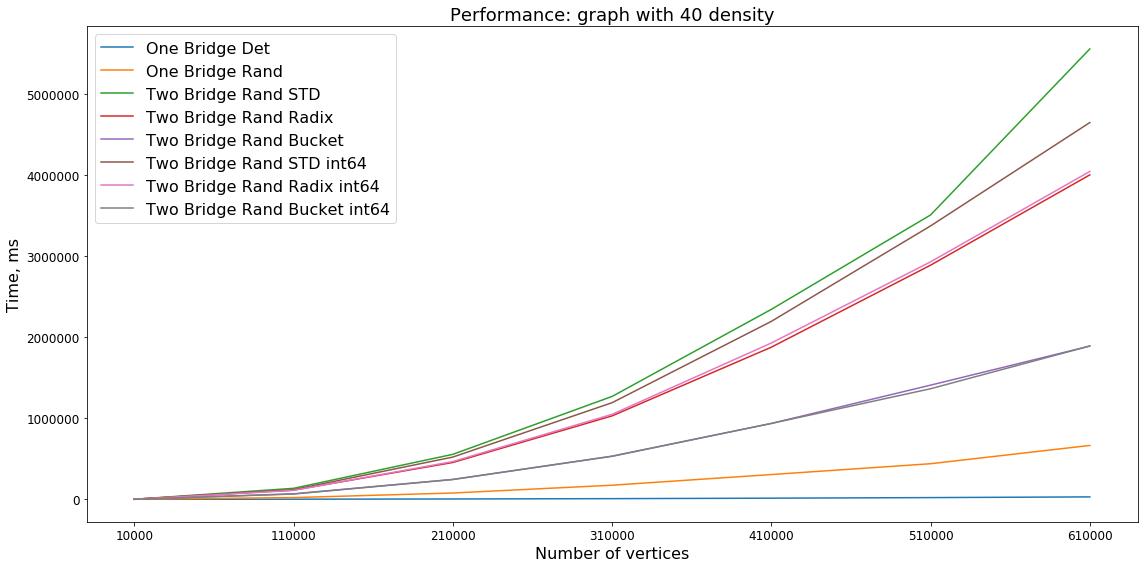

In [40]:
pl = Plotter(data)
pl.plot_performance()

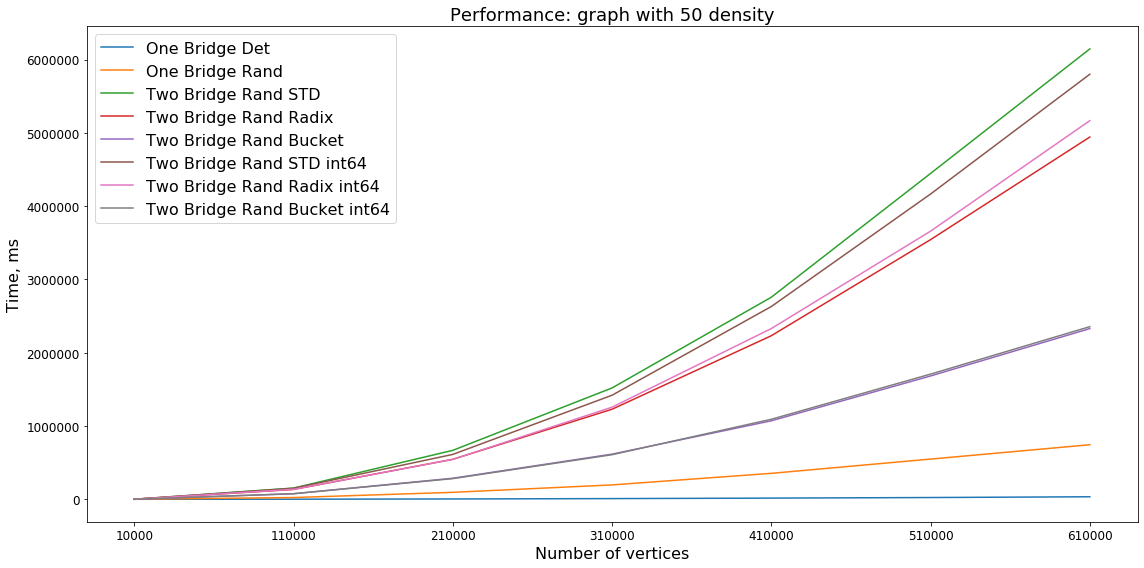

In [41]:
pl = Plotter(data, density_id='50')
pl.plot_performance()

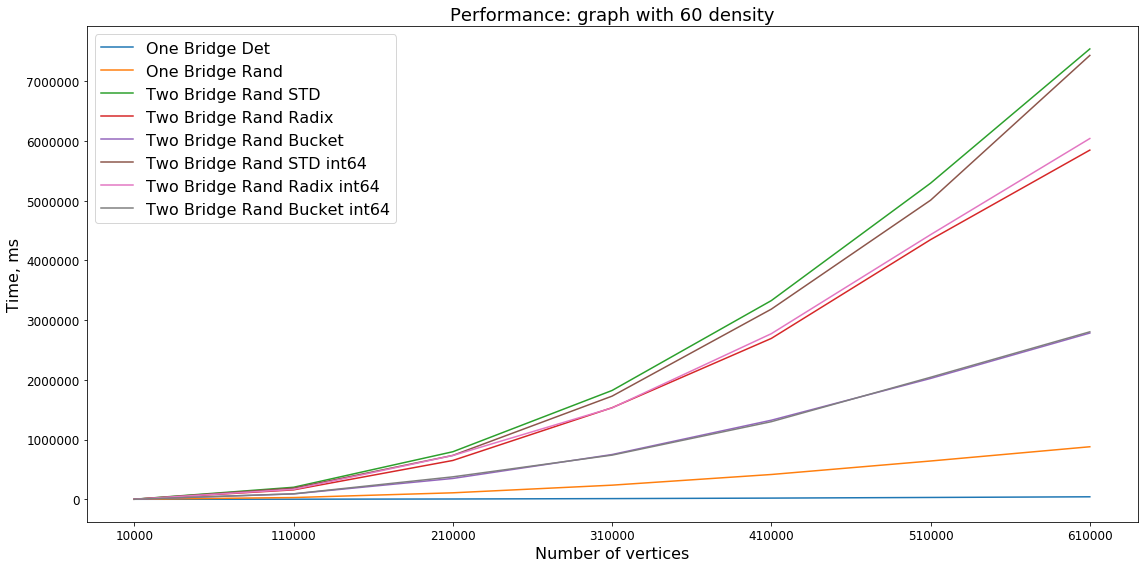

In [42]:
pl = Plotter(data, density_id='60')
pl.plot_performance()

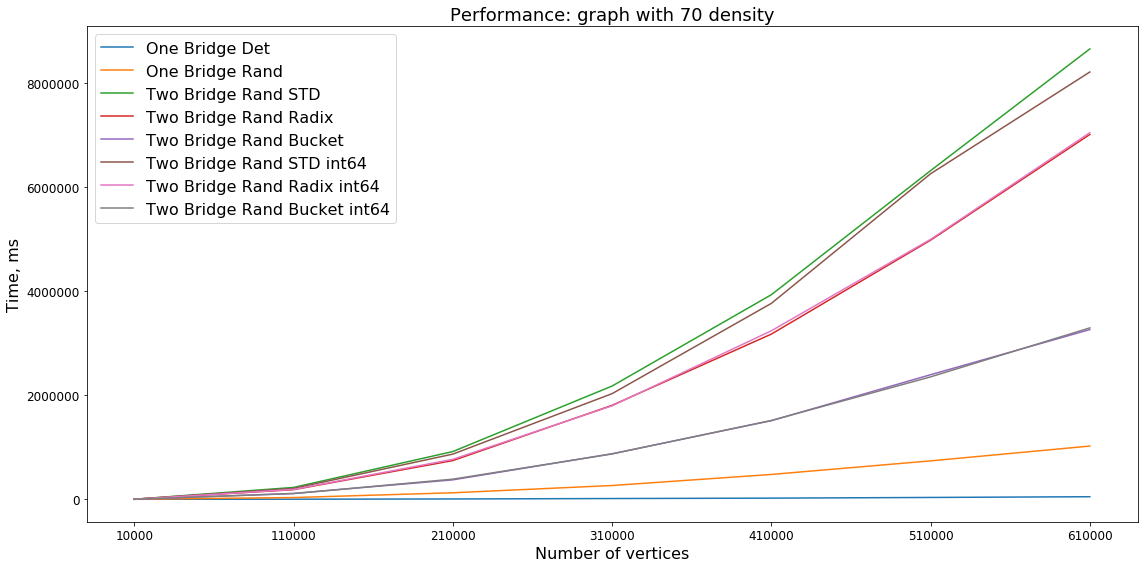

In [43]:
pl = Plotter(data, density_id='70')
pl.plot_performance()

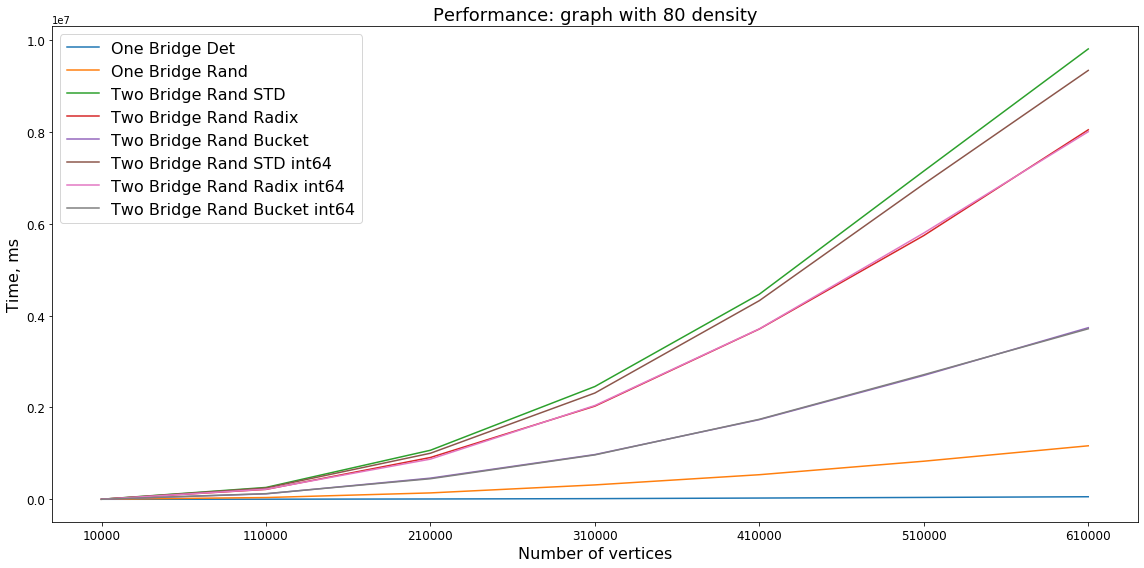

In [44]:
pl = Plotter(data, density_id='80')
pl.plot_performance()

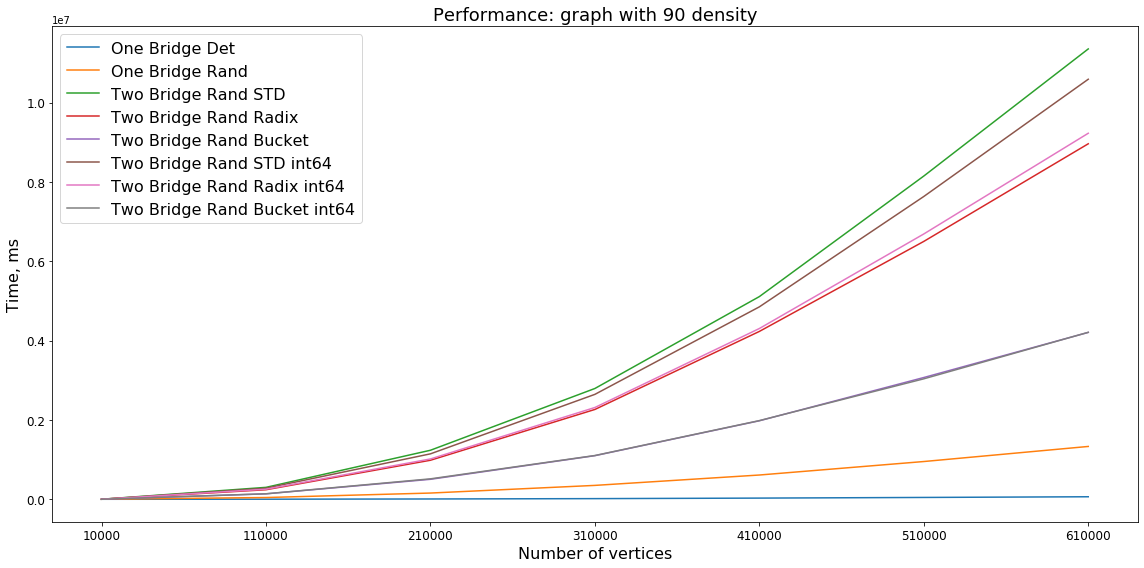

In [45]:
pl = Plotter(data, density_id='90')
pl.plot_performance()

### Эксперименты с публично доступными графами
https://snap.stanford.edu/data/


Description| Email-Enron | CA-AstroPh
--- | --- | ---
Edges |  367662 | 396160
Vertices|  36692  | 18772 



Algorithm | Email-Enron | CA-AstroPh
--- | --- | ---
One determenistic bridge | 33.265 | 21.425
One randomized bridge | 321.018 | 195.267
Two randomized bridge STD| 518.238 | 324.724
Two randomized bridge Radix | 492.003| 296.834
Two randomized bridge Bucket | 469.252 | 251.528
Two randomized bridge STD int64| 521.927 | 332.945
Two randomized bridge Radix int64| 503.118 | 297.002
Two randomized bridge Bucket int64| 488.011 | 263.639

### Вывод

В ходе работы были выполнены алгоритмы: детерминированный поиск один мостов, рандомизированный поиск один мостов, рандомизированный поиск два мостов.
Все алгоритмы показывают почти одинаковое поведение в случае до 100 вершин. Однако, далее можно заметить различия:
1.   Детерминированный один мост работает быстрее, чем рандомизированный один мост
2.   32-битная версия и 64-битная версия сортировок не сильно различаются по производительности. Однако, 32-битная чуть быстрее
3.   Рандомизированный два мост со стандартной сортировкой показывает самые низкие временные показатели. Однако, Рандомизированный два мост с bucket сортировкой демонстрирует значительное улучшение производительности

Полученные результаты показывают, что поведение алгоритмов относительно друг друга не сильно различается в зависимости от плотности графов и количества вершин (при условии, что вершин больше 100)